<a href="https://colab.research.google.com/github/lydiamokaya/RNN-STOCK-PREDICTION/blob/main/RNN%20STOCK%20PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [3]:
# Importing the training set
dataset_train = pd.read_csv('/content/trainset.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [8]:
# Initialising the RNN
regressor = Sequential()

In [9]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


In [10]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [13]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [14]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [15]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 113ms/step - loss: 0.0752
Epoch 2/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0054
Epoch 3/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0042
Epoch 4/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0035
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0032
Epoch 6/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0039
Epoch 7/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0034
Epoch 8/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0037
Epoch 9/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0033
Epoch 11/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0028
Epoch 12/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0025
Epoch 13/100

In [17]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/trainset.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [20]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[1028.602  ],
       [ 939.5158 ],
       [ 798.2601 ],
       [ 641.53674],
       [ 503.40176],
       [ 410.32956],
       [ 373.1387 ],
       [ 383.19113],
       [ 417.64255],
       [ 452.82852],
       [ 473.6934 ],
       [ 477.14233],
       [ 466.75964],
       [ 448.22073],
       [ 427.00757],
       [ 409.47202],
       [ 398.59357],
       [ 394.43893],
       [ 394.82867],
       [ 396.7005 ]], dtype=float32)

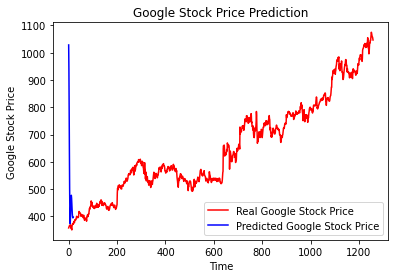

In [19]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()